# K-Means Clustering

In [44]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Read data into dataframe
df = pd.read_excel(r'F:\DSP\Class\Python\Basics\Mavoix\mavoix_ml_sample_dataset.xlsx', index_col = 0, header = 0)
df.head()

,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),Unnamed: 10,...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
Application_ID,,,,,,,,,,,,,,,,,,,,,
ML0001,Bangalore,0,2,0,2,0,2,3,2,NaN,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
ML0002,Bangalore,2,0,0,2,2,2,2,2,NaN,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
ML0003,Bangalore,3,0,1,2,2,2,0,2,NaN,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
ML0004,Bangalore,2,0,2,1,0,2,0,0,NaN,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
ML0005,Bangalore,2,0,0,2,0,2,1,1,NaN,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [46]:
# Check for the shape of the dataset
print(df.shape)
print()
# Check for the missing values
print(df.isnull().sum())

(392, 23)

Current City                    0
Python (out of 3)               0
R Programming (out of 3)        0
Deep Learning (out of 3)        0
PHP (out of 3)                  0
MySQL (out of 3)                0
HTML (out of 3)                 0
CSS (out of 3)                  0
JavaScript (out of 3)           0
Unnamed: 10                   392
AJAX (out of 3)                 0
Bootstrap (out of 3)            0
MongoDB (out of 3)              0
Node.js (out of 3)              0
ReactJS (out of 3)              0
Other skills                   14
Degree                         12
Stream                         18
Current Year Of Graduation      0
Performance_PG                289
Performance_UG                 54
Performance_12                163
Performance_10                177
dtype: int64


In [47]:
# To get the column names of the dataset
df.columns

Index(['Current City', 'Python (out of 3)', 'R Programming (out of 3)',
       'Deep Learning (out of 3)', 'PHP (out of 3)', 'MySQL (out of 3)',
       'HTML (out of 3)', 'CSS (out of 3)', 'JavaScript (out of 3)',
       'Unnamed: 10', 'AJAX (out of 3)', 'Bootstrap (out of 3)',
       'MongoDB (out of 3)', 'Node.js (out of 3)', 'ReactJS (out of 3)',
       'Other skills', 'Degree', 'Stream', 'Current Year Of Graduation',
       'Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10'],
      dtype='object')

In [48]:
# We take a subset of the variables which are important for model building
data=df.drop(['Current City','Unnamed: 10','Other skills','Degree','Stream','Current Year Of Graduation','Performance_PG',
              'Performance_UG','Performance_12','Performance_10'],axis=1)

In [49]:
data.shape

(392, 13)

In [50]:
data.columns

Index(['Python (out of 3)', 'R Programming (out of 3)',
       'Deep Learning (out of 3)', 'PHP (out of 3)', 'MySQL (out of 3)',
       'HTML (out of 3)', 'CSS (out of 3)', 'JavaScript (out of 3)',
       'AJAX (out of 3)', 'Bootstrap (out of 3)', 'MongoDB (out of 3)',
       'Node.js (out of 3)', 'ReactJS (out of 3)'],
      dtype='object')

In [51]:
data.isnull().sum()

Python (out of 3)           0
R Programming (out of 3)    0
Deep Learning (out of 3)    0
PHP (out of 3)              0
MySQL (out of 3)            0
HTML (out of 3)             0
CSS (out of 3)              0
JavaScript (out of 3)       0
AJAX (out of 3)             0
Bootstrap (out of 3)        0
MongoDB (out of 3)          0
Node.js (out of 3)          0
ReactJS (out of 3)          0
dtype: int64

In [52]:
data.dtypes

Python (out of 3)           int64
R Programming (out of 3)    int64
Deep Learning (out of 3)    int64
PHP (out of 3)              int64
MySQL (out of 3)            int64
HTML (out of 3)             int64
CSS (out of 3)              int64
JavaScript (out of 3)       int64
AJAX (out of 3)             int64
Bootstrap (out of 3)        int64
MongoDB (out of 3)          int64
Node.js (out of 3)          int64
ReactJS (out of 3)          int64
dtype: object

In [53]:
# Created a subset of the dataset for Data Scientist Position
datax=data.drop(['PHP (out of 3)','HTML (out of 3)','CSS (out of 3)','JavaScript (out of 3)',
                 'AJAX (out of 3)', 'Bootstrap (out of 3)', 'MongoDB (out of 3)','Node.js (out of 3)', 'ReactJS (out of 3)'],
               axis=1)

In [54]:
datax

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),MySQL (out of 3)
Application_ID,,,,
ML0001,0,2,0,0
ML0002,2,0,0,2
ML0003,3,0,1,2
ML0004,2,0,2,0
ML0005,2,0,0,0
...,...,...,...,...
ML0388,2,1,0,0
ML0389,2,0,0,0
ML0390,1,0,0,0


In [55]:
# Created a subset for Web Development Position
datay=data.drop(['Python (out of 3)', 'R Programming (out of 3)',
       'Deep Learning (out of 3)'],axis=1)

In [56]:
datay.head()

,PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3)
Application_ID,,,,,,,,,,
ML0001,2,0,2,3,2,0,2,0,0,0
ML0002,2,2,2,2,2,0,0,0,0,0
ML0003,2,2,2,0,2,0,0,0,0,0
ML0004,1,0,2,0,0,0,0,0,0,0
ML0005,2,0,2,1,1,0,0,2,2,2


In [57]:
# Taking the total score of the different skills which a Data Scientist should possess
datax['total']=datax['Python (out of 3)']+datax['R Programming (out of 3)']+datax['Deep Learning (out of 3)']+datax['MySQL (out of 3)']

In [59]:
datax['grandtotal']= 12
datax.head()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),MySQL (out of 3),total,grandtotal
Application_ID,,,,,,
ML0001,0,2,0,0,2,12
ML0002,2,0,0,2,4,12
ML0003,3,0,1,2,6,12
ML0004,2,0,2,0,4,12
ML0005,2,0,0,0,2,12


In [61]:
# build a model with total & garndtotal
# As arrays are lighter in weight hence it will work faster than the dataframe
X=datax.values[:,[4,5]]

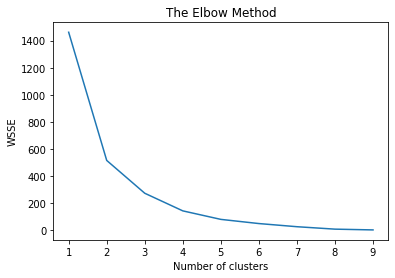

In [62]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wsse = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 10), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [64]:
# Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=3,random_state=10)
Y_pred=kmeans.fit_predict(X)

In [65]:
Y_pred
# the clusters no are allocated on the dataset
# since we have selected the no of clusters = 3, hence 0,1,2

array([0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2,
       1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1,
       1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,

In [66]:
datax['clusters']=Y_pred
# we are appending the clusters column to the dataset

In [67]:
datax

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),MySQL (out of 3),total,grandtotal,clusters
Application_ID,,,,,,,
ML0001,0,2,0,0,2,12,0
ML0002,2,0,0,2,4,12,1
ML0003,3,0,1,2,6,12,2
ML0004,2,0,2,0,4,12,1
ML0005,2,0,0,0,2,12,0
...,...,...,...,...,...,...,...
ML0388,2,1,0,0,3,12,1
ML0389,2,0,0,0,2,12,0
ML0390,1,0,0,0,1,12,0


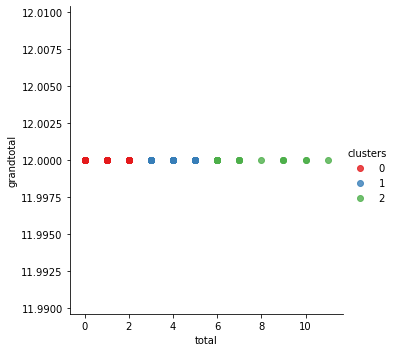

In [68]:
# Data Visualization
import seaborn as sns

sns.lmplot( data=datax, x='total', y='grandtotal',
    fit_reg=False, # No regression line
    hue='clusters',palette="Set1")


In [69]:
# Changing the numerical variable to categorical Variable
# in this case the cluster 
datax['clusters']=datax.clusters.map({0:'Not Applicable',1:'Maybe a Data Scientist',2:'Data Scientist'})

In [70]:
# Verifying the dataset
datax

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),MySQL (out of 3),total,grandtotal,clusters
Application_ID,,,,,,,
ML0001,0,2,0,0,2,12,Not Applicable
ML0002,2,0,0,2,4,12,Maybe a Data Scientist
ML0003,3,0,1,2,6,12,Data Scientist
ML0004,2,0,2,0,4,12,Maybe a Data Scientist
ML0005,2,0,0,0,2,12,Not Applicable
...,...,...,...,...,...,...,...
ML0388,2,1,0,0,3,12,Maybe a Data Scientist
ML0389,2,0,0,0,2,12,Not Applicable
ML0390,1,0,0,0,1,12,Not Applicable


In [25]:
# Subset data for Web Development Position
datay.head()

,PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3)
Application_ID,,,,,,,,,,
ML0001,2,0,2,3,2,0,2,0,0,0
ML0002,2,2,2,2,2,0,0,0,0,0
ML0003,2,2,2,0,2,0,0,0,0,0
ML0004,1,0,2,0,0,0,0,0,0,0
ML0005,2,0,2,1,1,0,0,2,2,2


In [26]:
datay.columns

Index(['PHP (out of 3)', 'MySQL (out of 3)', 'HTML (out of 3)',
       'CSS (out of 3)', 'JavaScript (out of 3)', 'AJAX (out of 3)',
       'Bootstrap (out of 3)', 'MongoDB (out of 3)', 'Node.js (out of 3)',
       'ReactJS (out of 3)'],
      dtype='object')

In [27]:
datay['total']=datay['PHP (out of 3)']+datay['MySQL (out of 3)']+datay['HTML (out of 3)']+datay['CSS (out of 3)']+datay['JavaScript (out of 3)']+datay['AJAX (out of 3)']+datay['Bootstrap (out of 3)']+datay['MongoDB (out of 3)']+datay['Node.js (out of 3)']+datay['ReactJS (out of 3)']

In [28]:
datay['grandtotal']= 30

In [29]:
datay

,PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),total,grandtotal
Application_ID,,,,,,,,,,,,
ML0001,2,0,2,3,2,0,2,0,0,0,11,30
ML0002,2,2,2,2,2,0,0,0,0,0,10,30
ML0003,2,2,2,0,2,0,0,0,0,0,8,30
ML0004,1,0,2,0,0,0,0,0,0,0,3,30
ML0005,2,0,2,1,1,0,0,2,2,2,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...
ML0388,0,0,2,0,0,0,0,0,0,0,2,30
ML0389,2,0,2,2,1,0,0,0,0,0,7,30
ML0390,0,0,2,2,1,0,0,0,0,0,5,30


In [30]:
X=datay.values[:,[10,11]]

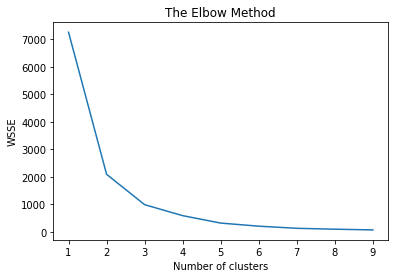

In [31]:
from sklearn.cluster import KMeans
wsse = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 10), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=3,random_state=10)
Y_pred=kmeans.fit_predict(X)

In [33]:
Y_pred

array([1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0,

In [34]:
datay['clusters']=Y_pred

In [35]:
datay

,PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),total,grandtotal,clusters
Application_ID,,,,,,,,,,,,,
ML0001,2,0,2,3,2,0,2,0,0,0,11,30,1
ML0002,2,2,2,2,2,0,0,0,0,0,10,30,1
ML0003,2,2,2,0,2,0,0,0,0,0,8,30,0
ML0004,1,0,2,0,0,0,0,0,0,0,3,30,2
ML0005,2,0,2,1,1,0,0,2,2,2,12,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ML0388,0,0,2,0,0,0,0,0,0,0,2,30,2
ML0389,2,0,2,2,1,0,0,0,0,0,7,30,0
ML0390,0,0,2,2,1,0,0,0,0,0,5,30,0


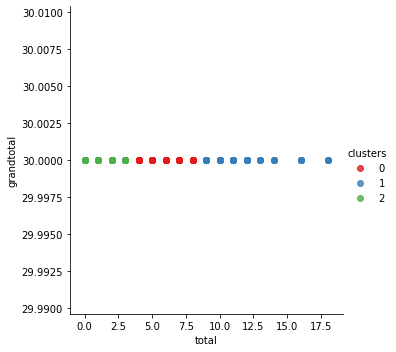

In [36]:
import seaborn as sns

sns.lmplot( data=datay, x='total', y='grandtotal',
    fit_reg=False, # No regression line
    hue='clusters',palette="Set1")

In [37]:
datay['clusters']=datay.clusters.map({0:'Not Applicable',1:'May be in Web Development',2:'Web Development'})

In [38]:
datay.head()

,PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),total,grandtotal,clusters
Application_ID,,,,,,,,,,,,,
ML0001,2,0,2,3,2,0,2,0,0,0,11,30,May be in Web Development
ML0002,2,2,2,2,2,0,0,0,0,0,10,30,May be in Web Development
ML0003,2,2,2,0,2,0,0,0,0,0,8,30,Not Applicable
ML0004,1,0,2,0,0,0,0,0,0,0,3,30,Web Development
ML0005,2,0,2,1,1,0,0,2,2,2,12,30,May be in Web Development


In [41]:
# Merging the Data Scientist & Web Development DataFrame
jd = pd.merge(datax, datay, on = 'Application_ID', how = 'inner', indicator = False)
jd.head()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),MySQL (out of 3)_x,total_x,grandtotal_x,clusters_x,PHP (out of 3),MySQL (out of 3)_y,HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),total_y,grandtotal_y,clusters_y
Application_ID,,,,,,,,,,,,,,,,,,,,
ML0001,0,2,0,0,2,12,Not Applicable,2,0,2,3,2,0,2,0,0,0,11,30,May be in Web Development
ML0002,2,0,0,2,4,12,Maybe a Data Scientist,2,2,2,2,2,0,0,0,0,0,10,30,May be in Web Development
ML0003,3,0,1,2,6,12,Data Scientist,2,2,2,0,2,0,0,0,0,0,8,30,Not Applicable
ML0004,2,0,2,0,4,12,Maybe a Data Scientist,1,0,2,0,0,0,0,0,0,0,3,30,Web Development
ML0005,2,0,0,0,2,12,Not Applicable,2,0,2,1,1,0,0,2,2,2,12,30,May be in Web Development


In [71]:
# Saving df to a file
df.to_csv(r'F:\DSP\Class\Python\Basics\Mavoix\JobRole.csv',
         index = True, header = True)
